<a href="https://colab.research.google.com/github/keerthanachennaveni/Tech/blob/main/Human_Activity_Recognition_using_Smartphone_Data_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.decomposition import PCA
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# import seaborn as sns
# import matplotlib.pyplot as plt


In [39]:
train = pd.read_csv("/content/sample_data/train-1.csv")
test = pd.read_csv("/content/sample_data/test.csv")

In [40]:
train['Data'] = 'Train'
test['Data'] = 'Test'
both = pd.concat([train, test], axis=0).reset_index(drop=True)
both['subject'] = '#' + both['subject'].astype(str)

In [41]:
train.shape, test.shape

((7352, 564), (2947, 564))

In [42]:
both.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,Data
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,#1,STANDING,Train
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,#1,STANDING,Train
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,#1,STANDING,Train
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,#1,STANDING,Train
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,#1,STANDING,Train


In [43]:
both.dtypes.value_counts()

float64    561
object       3
Name: count, dtype: int64

In [44]:
def basic_details(df):
    b = pd.DataFrame()
    b['Missing value'] = df.isnull().sum()
    b['N unique value'] = df.nunique()
    b['dtype'] = df.dtypes
    return b
basic_details(both)

,Missing value,N unique value,dtype
tBodyAcc-mean()-X,0,10292,float64
tBodyAcc-mean()-Y,0,10299,float64
tBodyAcc-mean()-Z,0,10293,float64
tBodyAcc-std()-X,0,10295,float64
tBodyAcc-std()-Y,0,10297,float64
...,...,...,...
"angle(Y,gravityMean)",0,10299,float64
"angle(Z,gravityMean)",0,10299,float64
subject,0,30,object
Activity,0,6,object


In [47]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Sample data (replace this with your actual data)
train = np.array([[1, 2, np.nan], [4, np.nan, 6], [7, 8, 9]])

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
train_imputed = imputer.fit_transform(train)

# Apply PCA
pca = PCA(n_components=0.9, random_state=0)
train_pca = pca.fit_transform(train_imputed)

print(train_pca)

[[-4.16467932]
 [-0.28623551]
 [ 4.45091483]]


<BarContainer object of 6 artists>

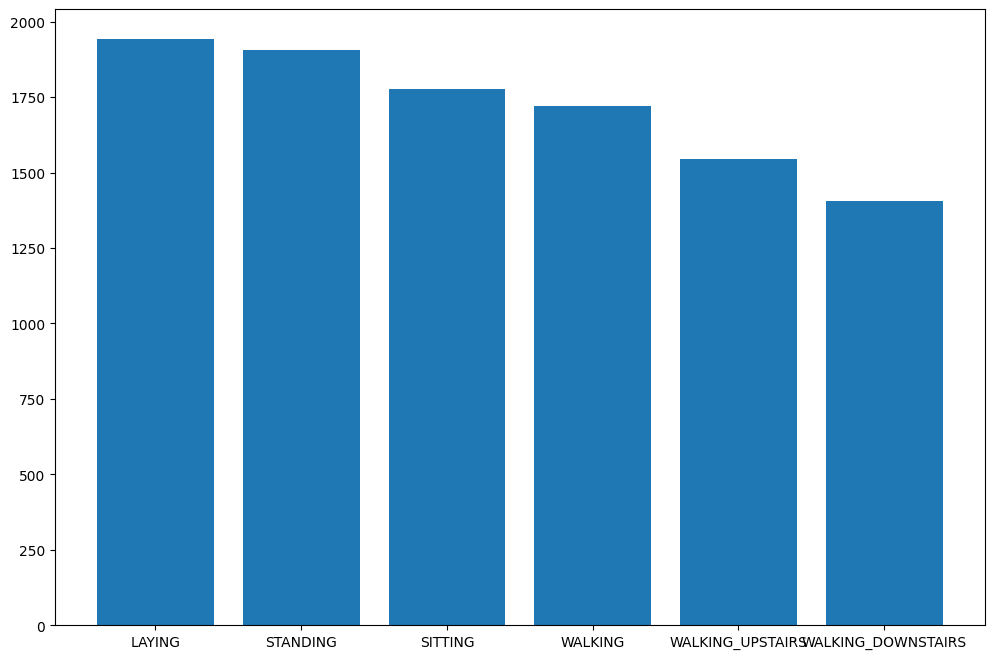

In [48]:
activity = both['Activity']
label_counts = activity.value_counts()

plt.figure(figsize= (12, 8))
plt.bar(label_counts.index, label_counts)

In [49]:
Data = both['Data']
Subject = both['subject']
train = both.copy()
train = train.drop(['Data','subject','Activity'], axis =1)

In [13]:
# # Standard Scaler
# from sklearn.preprocessing import StandardScaler
# slc = StandardScaler()
# train = slc.fit_transform(train)

# # dimensionality reduction
# from sklearn.decomposition import PCA
# pca = PCA(n_components=0.9, random_state=0)
# train = pca.fit_transform(train)

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, activity, test_size = 0.2, random_state = 0)

In [51]:
num_folds = 10
seed = 0
scoring = 'accuracy'
results = {}
accuracy = {}

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       377
           SITTING       0.98      0.95      0.97       364
          STANDING       0.96      0.98      0.97       390
           WALKING       0.99      1.00      1.00       335
WALKING_DOWNSTAIRS       1.00      0.98      0.99       278
  WALKING_UPSTAIRS       0.99      1.00      1.00       316

          accuracy                           0.99      2060
         macro avg       0.99      0.99      0.99      2060
      weighted avg       0.99      0.99      0.99      2060



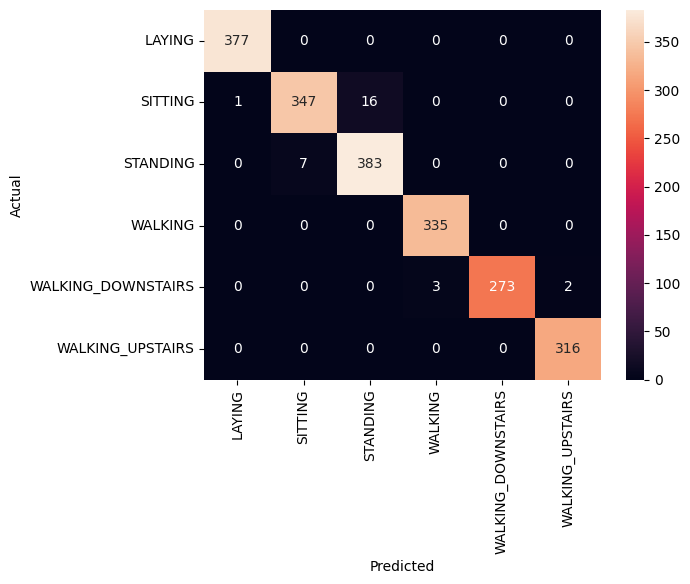

In [52]:
# Finalizing the model and comparing the test, predict results
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# from sklearn.model_selection import KFold, cross_val_score
# model = KNeighborsClassifier(algorithm='auto', n_neighbors=8, p=1, weights='distance')
# scoring = 'accuracy'  # Define your scoring method

# _ = cross_val_score(model, X_train, y_train, cv=10, scoring=scoring)
# results = {}
# results["GScv"] = (_.mean(), _.std())

# model.fit(X_train, y_train)
# y_predict = model.predict(X_test)

# accuracy = {}
# accuracy["GScv"] = accuracy_score(y_test, y_predict)

# print(classification_report(y_test, y_predict))

# cm = confusion_matrix(y_test, y_predict)
# sns.heatmap(cm, annot=True)


# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import LabelEncoder
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# from sklearn.model_selection import KFold, cross_val_score


# # Example data (replace with your actual data)
# X_train = pd.DataFrame(X_train)
# y_train = pd.Series(y_train)
# X_test = pd.DataFrame(X_test)
# y_test = pd.Series(y_test)

# # Convert all columns in X_train and X_test to numeric, coercing errors to NaN
# X_train = X_train.apply(pd.to_numeric, errors='coerce')
# X_test = X_test.apply(pd.to_numeric, errors='coerce')

# # Handle missing values if any (e.g., impute with mean or drop)
# X_train = X_train.fillna(X_train.mean())
# X_test = X_test.fillna(X_test.mean())

# # Encode categorical variables in y_train and y_test if any
# le = LabelEncoder()
# if y_train.dtype == 'object':
#     y_train = le.fit_transform(y_train)
# if y_test.dtype == 'object':
#     y_test = le.fit_transform(y_test)

# # Define your model and perform cross-validation
# model = KNeighborsClassifier(algorithm='auto', n_neighbors=8, p=1, weights='distance')
# # scoring = 'accuracy'  # Define your scoring method

# _ = cross_val_score(model, X_train, y_train, cv=10, scoring=scoring)
# # results = {}
# results["GScv"] = (_.mean(), _.std())

# model.fit(X_train, y_train)
# y_predict = model.predict(X_test)

# accuracy = {}
# accuracy["GScv"] = accuracy_score(y_test, y_predict)

# print(classification_report(y_test, y_predict))

# cm = confusion_matrix(y_test, y_predict)
# sns.heatmap(cm, annot=True)
# # plt.show()



import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_train, y_train, X_test, y_test are already defined

# Convert all columns in X_train and X_test to numeric, coercing errors to NaN
X_train = pd.DataFrame(X_train).apply(pd.to_numeric, errors='coerce')
X_test = pd.DataFrame(X_test).apply(pd.to_numeric, errors='coerce')

# Handle missing values if any (e.g., impute with mean or drop)
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

# Encode categorical variables in y_train and y_test if any
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Define your model and perform cross-validation
model = KNeighborsClassifier(algorithm='auto', n_neighbors=8, p=1, weights='distance')
scoring = 'accuracy'  # Define your scoring method

_ = cross_val_score(model, X_train, y_train_encoded, cv=10, scoring=scoring)
results = {}
results["GScv"] = (_.mean(), _.std())

model.fit(X_train, y_train_encoded)
y_predict_encoded = model.predict(X_test)

# Decode the predictions back to original labels
y_predict = le.inverse_transform(y_predict_encoded)

accuracy = {}
accuracy["GScv"] = accuracy_score(y_test, y_predict)

print(classification_report(y_test, y_predict))

cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
